In [151]:
#!pip3 install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_rows', 500)

coding_rate = {0: 4/5,
                1: 4/5,
                2: 4/5,
                3: 4/5,
                4: 4/5,
                5: 4/5,
                8: 1/3,
                9: 2/3,
                10: 1/3,
                11: 2/3}

bitrate = {0: 250, 1: 440, 2: 980 ,3: 1760, 4: 3125 , 5: 5470} #bits/s

df = pd.read_csv('simulation_data.csv', index_col=False)
df['lora_eff_bitrate'] = (df['payload_size']*df['lora_rx_pkts_mean']*df['lora_cr'])*8/3600
df.head()


,Unnamed: 0,type,annulus_width,lora_devices,lora_e_devices,lora_dr,lora_e_dr,lora_cr,lora_e_cr,lora_tx_pkts_mean,lora_tx_pkts_std,lora_e_tx_pkts_mean,lora_e_tx_pkts_std,lora_rx_pkts_mean,lora_rx_pkts_std,lora_e_rx_pkts_mean,lora_e_rx_pkts_std,payload_size,lora_eff_bitrate
0,0,DISTANCE,0,50,1,0,8,0.8,0.333333,1840.733333,39.875584,14.633333,3.071192,772.966667,22.121608,6.900000,2.521243,10,13.741630
1,1,DISTANCE,0,50,10,0,8,0.8,0.333333,1854.800000,45.213862,143.766667,9.174905,717.866667,20.639337,70.933333,7.911735,10,12.762074
2,2,DISTANCE,0,50,50,0,8,0.8,0.333333,1830.366667,37.621344,713.933333,25.937018,524.566667,17.003300,352.800000,22.091326,10,9.325630
3,3,DISTANCE,0,50,100,0,8,0.8,0.333333,1838.266667,33.714422,1430.300000,28.220737,346.333333,14.469124,695.633333,22.186307,10,6.157037
4,4,DISTANCE,0,50,300,0,8,0.8,0.333333,1836.633333,38.408752,4319.866667,70.248954,70.333333,7.440131,2110.000000,53.860932,10,1.250370


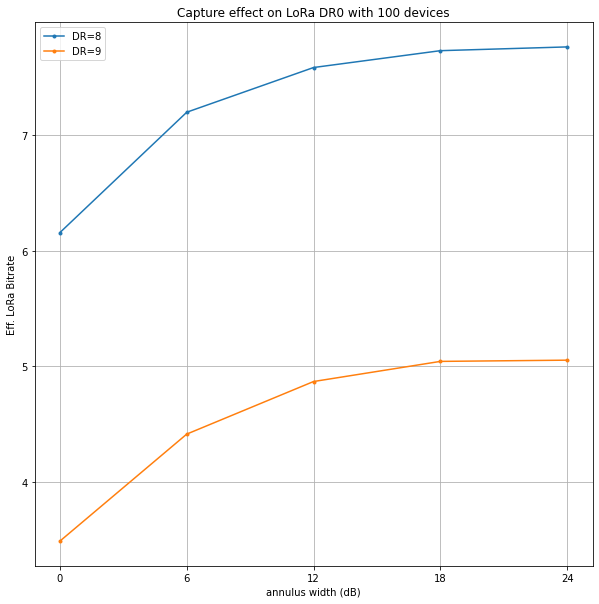

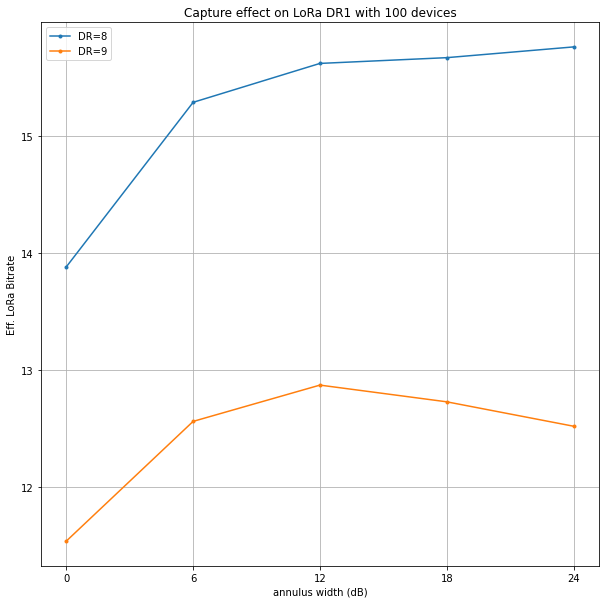

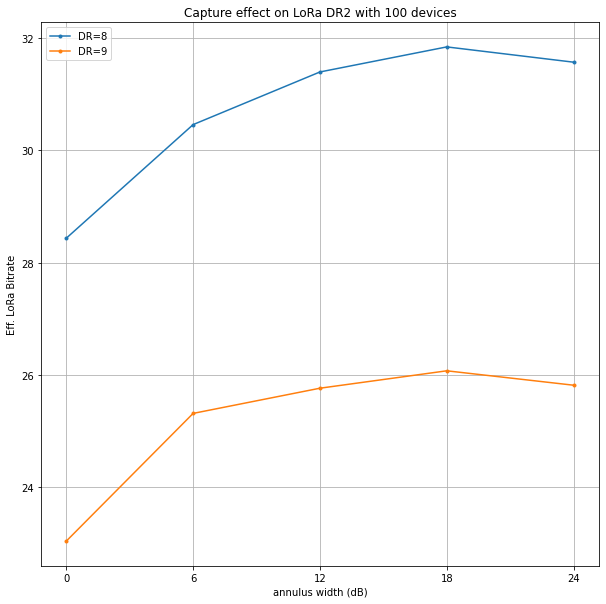

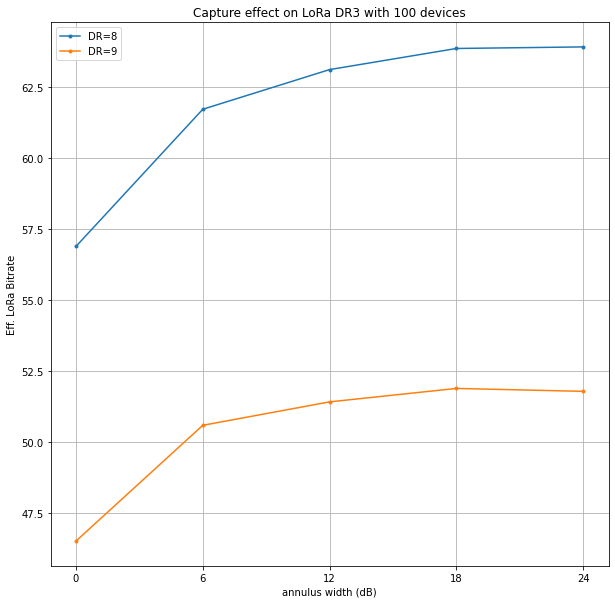

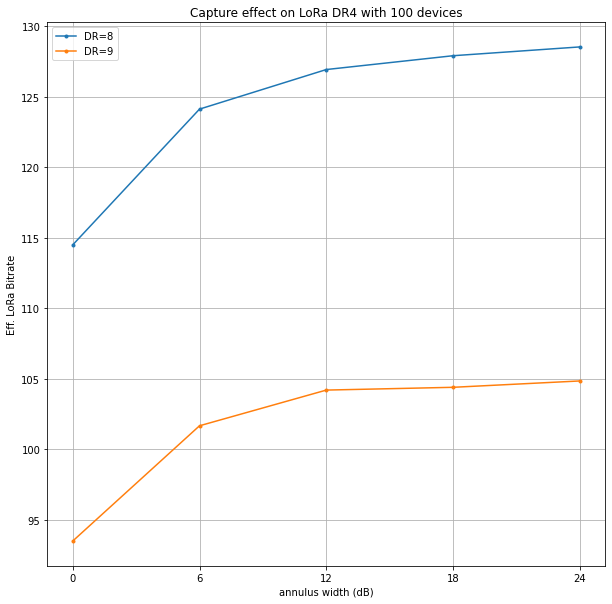

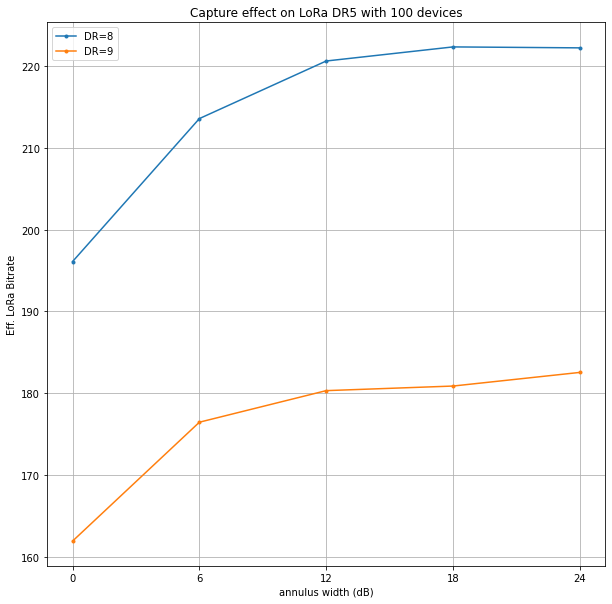

In [202]:
df_100_devs = df[(df['type'] == 'POWER') & 
                    (df['lora_e_devices'] == 100)].sort_values(by='annulus_width')

for lora_dr in df['lora_dr'].unique():
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f'Capture effect on LoRa DR{lora_dr} with 100 devices')
    ax.set_xticks(df_100_devs['annulus_width'].unique())
    ax.grid(True, 'both')
    ax.set_xlabel('annulus width (dB)')
    ax.set_ylabel('Eff. LoRa Bitrate')
    for lora_e_dr in df_100_devs['lora_e_dr'].unique():
        df_100_devs_lora_E_dr = df_100_devs[(df_100_devs['lora_dr'] == lora_dr) &
                                                (df_100_devs['lora_e_dr'] == lora_e_dr)]                      
        ax.plot(df_100_devs['annulus_width'].unique(), df_100_devs_lora_E_dr['lora_eff_bitrate'], marker='.', label=f'DR={lora_e_dr}')
    ax.legend()
    plt.show() 
